In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [3]:
df = pd.read_csv("C:/Users/admin/Intern/DataSets/Mall_Customers.csv")


In [11]:
# Simulate GPS-like coordinates (Latitude, Longitude) for fun
np.random.seed(42)
df['Lat'] = np.random.uniform(low=20.0, high=25.0, size=len(df))
df['Lon'] = np.random.uniform(low=70.0, high=75.0, size=len(df))

# We'll use Location + Spending behavior
X = df[['Lat', 'Lon', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [12]:

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
dbscan = DBSCAN(eps=0.8, min_samples=4)
labels = dbscan.fit_predict(X_scaled)

df['Cluster'] = labels


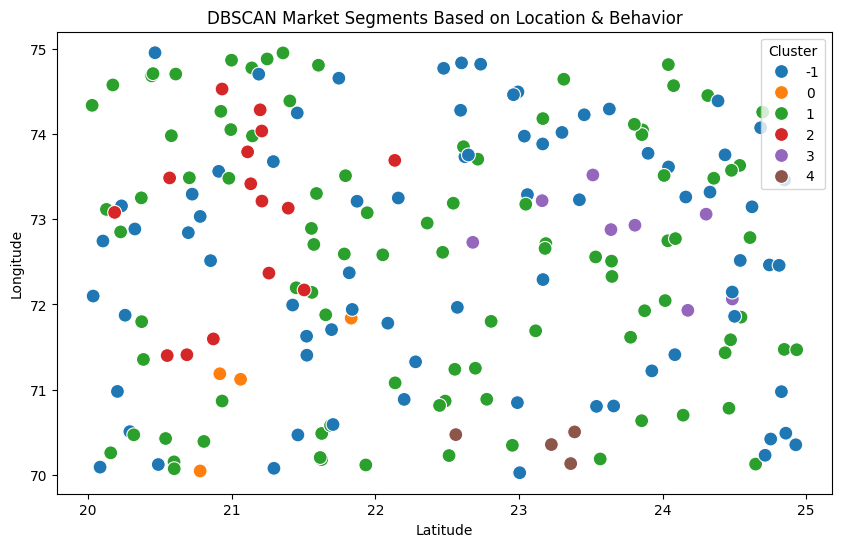

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Lat', y='Lon', hue='Cluster', palette='tab10', s=100)
plt.title("DBSCAN Market Segments Based on Location & Behavior")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


In [15]:
outliers = df[df['Cluster'] == -1]
print("Outliers Detected:", len(outliers))
print(outliers[['CustomerID', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)', 'Lat', 'Lon']])


Outliers Detected: 75
     CustomerID  Gender  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male                  15                      39   
1             2    Male                  15                      81   
2             3  Female                  16                       6   
3             4  Female                  16                      77   
4             5  Female                  17                      40   
..          ...     ...                 ...                     ...   
195         196  Female                 120                      79   
196         197  Female                 126                      28   
197         198    Male                 126                      74   
198         199    Male                 137                      18   
199         200    Male                 137                      83   

           Lat        Lon  
0    21.872701  73.210158  
1    24.753572  70.420700  
2    23.659970  70.808144  
3    22.99329

In [16]:
# Silhouette score (excluding noise)
mask = df['Cluster'] != -1
score = silhouette_score(X_scaled[mask], df.loc[mask, 'Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.10595395397704127
